# Task Selection for MTEB(EU)


In [15]:
from __future__ import annotations

import mteb

print(mteb.__version__)

1.12.48


## Loading in data
We will start out by loading in the relevant data for the model and tasks of interests.

In [16]:
def get_models():
    model_names = [
        "sentence-transformers/all-MiniLM-L6-v2",
        "sentence-transformers/all-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-mpnet-base-v2",
        "sentence-transformers/all-mpnet-base-v2",
        "sentence-transformers/LaBSE",
        "intfloat/multilingual-e5-large-instruct",
        "intfloat/e5-mistral-7b-instruct",
        "GritLM/GritLM-7B",
        "GritLM/GritLM-8x7B",
        "intfloat/multilingual-e5-small",
        "intfloat/multilingual-e5-base",
        "intfloat/multilingual-e5-large",
    ]
    models: list[mteb.ModelMeta] = [mteb.get_model_meta(name) for name in model_names]

    # get missing revisions - Assuming we are using the latest revision
    for model in models:
        if model.revision is None:
            print(f"Getting revision for {model.name}")
            encoder = model.load_model()
            model.revision = encoder.model_card_data.base_model_revision  # type: ignore

    return models


models = get_models()

Getting revision for sentence-transformers/all-MiniLM-L12-v2
Getting revision for sentence-transformers/all-mpnet-base-v2


In [67]:
# load tasks
eu_languages = [
    # official EU languages (56) - we could include the whole economic area e.g. Norway - additioanlly we could include minority languages (probably a good idea?)
    # germanic
    "dan",
    "eng",
    "deu",
    "nld",
    "swe",
    # romance
    "fra",
    "ita",
    "por",
    "spa",
    "ron",
    # slavic
    "bul",
    "hrv",
    "ces",
    "pol",
    "slk",
    "slv",
    # baltic
    "lav",
    "lit",
    "est",
    # finno-ugric
    "fin",
    "hun",
    # other indo european
    "ell",
    # non-indo european
    "mlt",
    "gle",
    # Shengen Area
    "nno",
    "nob",
    "isl",
    "ron",
    "eus",  # Basque - recognized minority language
    "ron",  # Romanian - recognized minority language
]


eu_tasks = mteb.get_tasks(
    languages=eu_languages,
)  # does not need to language - you can also filter by task types, domains, etc.

print(f"Number of tasks: {len(eu_tasks)}")

Number of tasks: 420


In [68]:
not_include = [
    'DKHateClassification', # # due to it being a gated dataset on huggingface (requiring to sign a form)
    # was added after models were run
    'SouthAfricanLangClassification', 
    'BrightRetrieval', 
    'LitSearchRetrieval', 
    'MSMARCO', 
    'SpanishPassageRetrievalS2P', 
    'XStance', 
    'MIRACLReranking', 
     'SICK-BR-STS',
    "PublicHealthQA", # some error in initial run of the dataset
    # model model had an error on this - likely contains empty examples:
    "YahooAnswersTopicsClassification", 
    "FrenchBookReviews",
    "SlovakSumRetrieval",
    "LegalBenchPC",
    "RomanianSentimentClassification",
    "GPUSpeedTask", # for speed testing
    "CPUSpeedTask", # for speed testing
    "MSMARCOv2", # too large to be practical for a benchmark
    "SIB200Classification", # we will be using the SIB200 dataset for Cluster Classification so as they are the same dataset we will not include this one
    "SummEval", # due to https://github.com/embeddings-benchmark/mteb/issues/1156
]
retrieval_to_be_downsampled = [  # TODO: Removing this list when tasks are ready
    "TopiOCQA",
    "MSMARCO-PL",
    "ClimateFEVER",
    "FEVER",
    "HotpotQA",
    "HotpotQA-PL",
    "DBPedia",
    "DBPedia-PL",
    "NeuCLIR2022Retrieval",
    "NeuCLIR2023Retrieval",
    "NeuCLIR2022Retrieval",
    "NeuCLIR2023Retrieval",
    "NQ",
    "NQ-PL",
    "NeuCLIR2022Retrieval",
    "NeuCLIR2023Retrieval",
    "MIRACLRetrieval",
    "RiaNewsRetrieval",
    "Quora-PL",
    "QuoraRetrieval",
]
not_include += retrieval_to_be_downsampled

eu_tasks = [t for t in eu_tasks if t.metadata.name not in not_include]
# exlude machine translated tasks
eu_tasks = [t for t in eu_tasks if t.metadata.sample_creation not in  [
        "machine-translated",
        "machine-translated and verified",
        "machine-translated and localized",
    ]]

print(f"Number of tasks after filtering: {len(eu_tasks)}")

Number of tasks after filtering: 382


In [69]:
# load results from mteb/results repository
mteb_results = mteb.load_results(models=models, tasks=eu_tasks, download_latest=False)

In [70]:
mteb_results

{'intfloat/multilingual-e5-small': {'e4ce9877abf3edfe10b0d82785e83bdcb973e22e': [MTEBResults(task_name=IndicGenBenchFloresBitextMining, scores=...),
   MTEBResults(task_name=PpcPC, scores=...),
   MTEBResults(task_name=TwentyNewsgroupsClustering.v2, scores=...),
   MTEBResults(task_name=FinancialPhrasebankClassification, scores=...),
   MTEBResults(task_name=TenKGnadClusteringP2P.v2, scores=...),
   MTEBResults(task_name=CUADRevenueProfitSharingLegalBenchClassification, scores=...),
   MTEBResults(task_name=AfriSentiClassification, scores=...),
   MTEBResults(task_name=FaithDial, scores=...),
   MTEBResults(task_name=NYSJudicialEthicsLegalBenchClassification, scores=...),
   MTEBResults(task_name=NorQuadRetrieval, scores=...),
   MTEBResults(task_name=STS13, scores=...),
   MTEBResults(task_name=SCDBPAuditsLegalBenchClassification, scores=...),
   MTEBResults(task_name=CataloniaTweetClassification, scores=...),
   MTEBResults(task_name=SpanishPassageRetrievalS2S, scores=...),
   MTEBRe

In [71]:
import mteb.task_selection as task_selection

results_df = task_selection.results_to_dataframe(
    mteb_results, drop_na=False, languages=eu_languages
)

In [72]:
results_df.head()  # inspect the dataframe

,task,AILACasedocs,AILAStatutes,ARCChallenge,AfriSentiClassification,AfriSentiLangClassification,AllegroReviews,AlloProfClusteringP2P.v2,AlloProfClusteringS2S.v2,AlloprofReranking,AlloprofRetrieval,...,WikiCitiesClustering,WikiClusteringP2P.v2,WikipediaRerankingMultilingual,WikipediaRetrievalMultilingual,WinoGrande,XMarket,XNLI,XPQARetrieval,XQuADRetrieval,YelpReviewFullClassification
model,revision,,,,,,,,,,,,,,,,,,,,,
GritLM/GritLM-7B,13f00a0e36500c80ce12870ea513846a066004af,0.35292,0.41800,0.26677,0.439404,0.931445,0.567694,0.671576,0.564118,0.779262,0.55422,...,0.836619,0.276693,0.924117,0.934731,0.53697,0.259600,0.784399,0.493916,0.961998,0.650635
intfloat/e5-mistral-7b-instruct,07163b72af1488142a360786df853f237b1a3ca1,0.36662,0.34535,0.19001,0.406934,0.921680,0.597813,0.691183,0.571120,0.783177,0.54619,...,0.890336,0.287826,0.916219,0.927265,0.39514,0.287633,0.821737,0.456863,0.951960,0.618311
intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.26053,0.20371,0.09611,0.400586,0.671191,0.407753,0.631008,0.341132,0.658972,0.34447,...,0.798718,0.241045,0.886177,0.899056,0.56177,0.167343,0.718563,0.391408,0.963752,0.597217
intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.26427,0.20842,0.10828,0.423193,0.642822,0.410437,0.636065,0.351508,0.694429,0.39341,...,0.755041,0.249324,0.905086,0.917812,0.54985,0.171770,0.749804,0.457246,0.974800,0.643164
intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.33330,0.29659,0.15027,0.423486,0.914404,0.524254,0.669222,0.564657,0.746777,0.52118,...,0.762207,0.287510,0.918727,0.926954,0.54272,0.256423,0.806215,0.504125,0.970556,0.652686


In [73]:
# which tasks are missing?
missing_tasks = results_df[results_df.isna().any(axis=1)]
missing_tasks = missing_tasks.loc[:, missing_tasks.isna().any()]
missing_tasks # should be empty

,task
model,revision


# Task Selection

In this section we will do the task selection to construct a benchmark.

In [74]:
# tasks with exactly the same results for all models (i.e. columns where all values are the same)
same_results = results_df.loc[:, results_df.nunique() == 1]
same_results

,task,Diversity1LegalBenchClassification,Diversity2LegalBenchClassification
model,revision,,
GritLM/GritLM-7B,13f00a0e36500c80ce12870ea513846a066004af,0.763333,0.746667
intfloat/e5-mistral-7b-instruct,07163b72af1488142a360786df853f237b1a3ca1,0.763333,0.746667
intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.763333,0.746667
intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.763333,0.746667
intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.763333,0.746667
intfloat/multilingual-e5-small,e4ce9877abf3edfe10b0d82785e83bdcb973e22e,0.763333,0.746667
sentence-transformers/LaBSE,e34fab64a3011d2176c99545a93d5cbddc9a91b7,0.763333,0.746667
sentence-transformers/all-MiniLM-L12-v2,a05860a77cef7b37e0048a7864658139bc18a854,0.763333,0.746667
sentence-transformers/all-MiniLM-L6-v2,8b3219a92973c328a8e22fadcfa821b5dc75636a,0.763333,0.746667


In [75]:
# remove these tasks from the tasks
print(f"Number of tasks before removing tasks with same results: {len(eu_tasks)}")
eu_tasks = [t for t in eu_tasks if t.metadata.name not in same_results.columns]
print(f"Number of tasks after removing tasks with same results: {len(eu_tasks)}")

Number of tasks before removing tasks with same results: 382
Number of tasks after removing tasks with same results: 380


In [76]:
licenses_to_remove =["Not specified", "Unknown"] # remove tasks with unknown licenses
# Note: this implicitly penalizes low-resource languages, as they are more likely to have unknown licenses - though this is probably still a reasonable choice

print(f"Number of tasks before: {len(eu_tasks)}")
eu_tasks = [t for t in eu_tasks if t.metadata.name not in licenses_to_remove]
print(f"Number of tasks after: {len(eu_tasks)}")

Number of tasks before: 380
Number of tasks after: 380


### Iterative Automated Task Selection 

In [77]:
# tasks with more than N eu languages
eu_langs = set(eu_languages)
tasks_with_many_languages = [t for t in eu_tasks if len(set(t.languages) & eu_langs) > 5]
tasks_with_many_languages

[BibleNLPBitextMining(name='BibleNLPBitextMining', languages=['aai', 'aak', 'aau', '...']),
 FloresBitextMining(name='FloresBitextMining', languages=['ace', 'acm', 'acq', '...']),
 IWSLT2017BitextMining(name='IWSLT2017BitextMining', languages=['ara', 'cmn', 'deu', '...']),
 NTREXBitextMining(name='NTREXBitextMining', languages=['afr', 'amh', 'arb', '...']),
 TatoebaBitextMining(name='Tatoeba', languages=['afr', 'amh', 'ang', '...']),
 LanguageClassification(name='LanguageClassification', languages=['ara', 'bul', 'cmn', '...']),
 MassiveIntentClassification(name='MassiveIntentClassification', languages=['dan', 'deu', 'ell', '...']),
 MassiveScenarioClassification(name='MassiveScenarioClassification', languages=['dan', 'deu', 'ell', '...']),
 MultiHateClassification(name='MultiHateClassification', languages=['deu', 'eng', 'fra', '...']),
 MultilingualSentimentClassification(name='MultilingualSentimentClassification', languages=['bul', 'deu', 'ell', '...']),
 TweetSentimentClassification(

In [27]:
# tasks which should be kept, e.g. due to them being known high quality datasets, unique tasks, etc.
tasks_to_keep = [
    # dataset with good coverage of languages and of reasonable quality
    "WikipediaRerankingMultilingual", 
    "MultiEURLEXMultilabelClassification",
    "SIB200ClusteringFast",
    "WikipediaRetrievalMultilingual",
    "BibleNLPBitextMining",
    "MultiHateClassification",
    "XNLI",
    "TweetSentimentClassification",
]

def is_candidate_valid_removal(current_tasks: list[str], task_to_remove: str) -> bool:
    """Determine if target task should be removed. 
    This checks that all task types are present in the current tasks or whether the task is in the tasks_to_keep list.
    This is all conducted within language.
    """

    if task_to_remove in tasks_to_keep:
        return False

    # check if removing task removes a unique task type - if so, don't remove
    _current_tasks = current_tasks.copy()
    if task_to_remove in _current_tasks:
        _current_tasks.remove(task_to_remove)
    task = mteb.get_task(task_to_remove)
    ctasks = mteb.get_tasks(tasks=_current_tasks)

    # don't remove a unique task type
    task_types = {t.metadata.type for t in ctasks}
    if task.metadata.type not in task_types:
        return False

    # check that removing the task does not remove a unique task type within the language
    _languages_covered_by_task_type = [t.metadata.language for t in ctasks if t.metadata.type == task.metadata.type]
    languages_covered_by_task_type = {lang for sublist in _languages_covered_by_task_type for lang in sublist}

    if not set(task.metadata.languages).issubset(languages_covered_by_task_type):
        return False

    return True

In [53]:
from sklearn.linear_model import LinearRegression

# remove tasks one by one
tasks_to_select_from = [t.metadata.name for t in eu_tasks]

tasks_removed = []
predicability_scores = []

while tasks_to_select_from:
    most_pred_tasks = task_selection.most_predictable_task(
        results_df[tasks_to_select_from],
        sklearn_estimator=LinearRegression(),
        metrics=[
            task_selection.spearman,
            task_selection.pearson,
            task_selection.mse_with_zscore,
        ],
    )

    # if all tasks are hard to predict, we are done
    if all(mpt[list(mpt.keys())[0]]["mse_with_zscore"]>1 or mpt[list(mpt.keys())[0]]["spearman"]<0.8 for mpt in most_pred_tasks):
        break

    # reverse the list to get the least predictable task
    most_pred_tasks.reverse()

    while most_pred_tasks:
        most_pred_task = most_pred_tasks.pop()
        most_pred_task_name = list(most_pred_task.keys())[0]
        if is_candidate_valid_removal(tasks_to_select_from, most_pred_task_name):
            tasks_to_select_from.remove(most_pred_task_name)
            tasks_removed.append(most_pred_task_name)
            predicability_scores.append(most_pred_task[most_pred_task_name])
            break
    
    if not most_pred_tasks:  # if no task was removed, then we are done -- can be replaced with another stopping criterion
        break

Task: STSES: 100%|██████████| 35/35 [00:01<00:00, 22.46it/s]                               


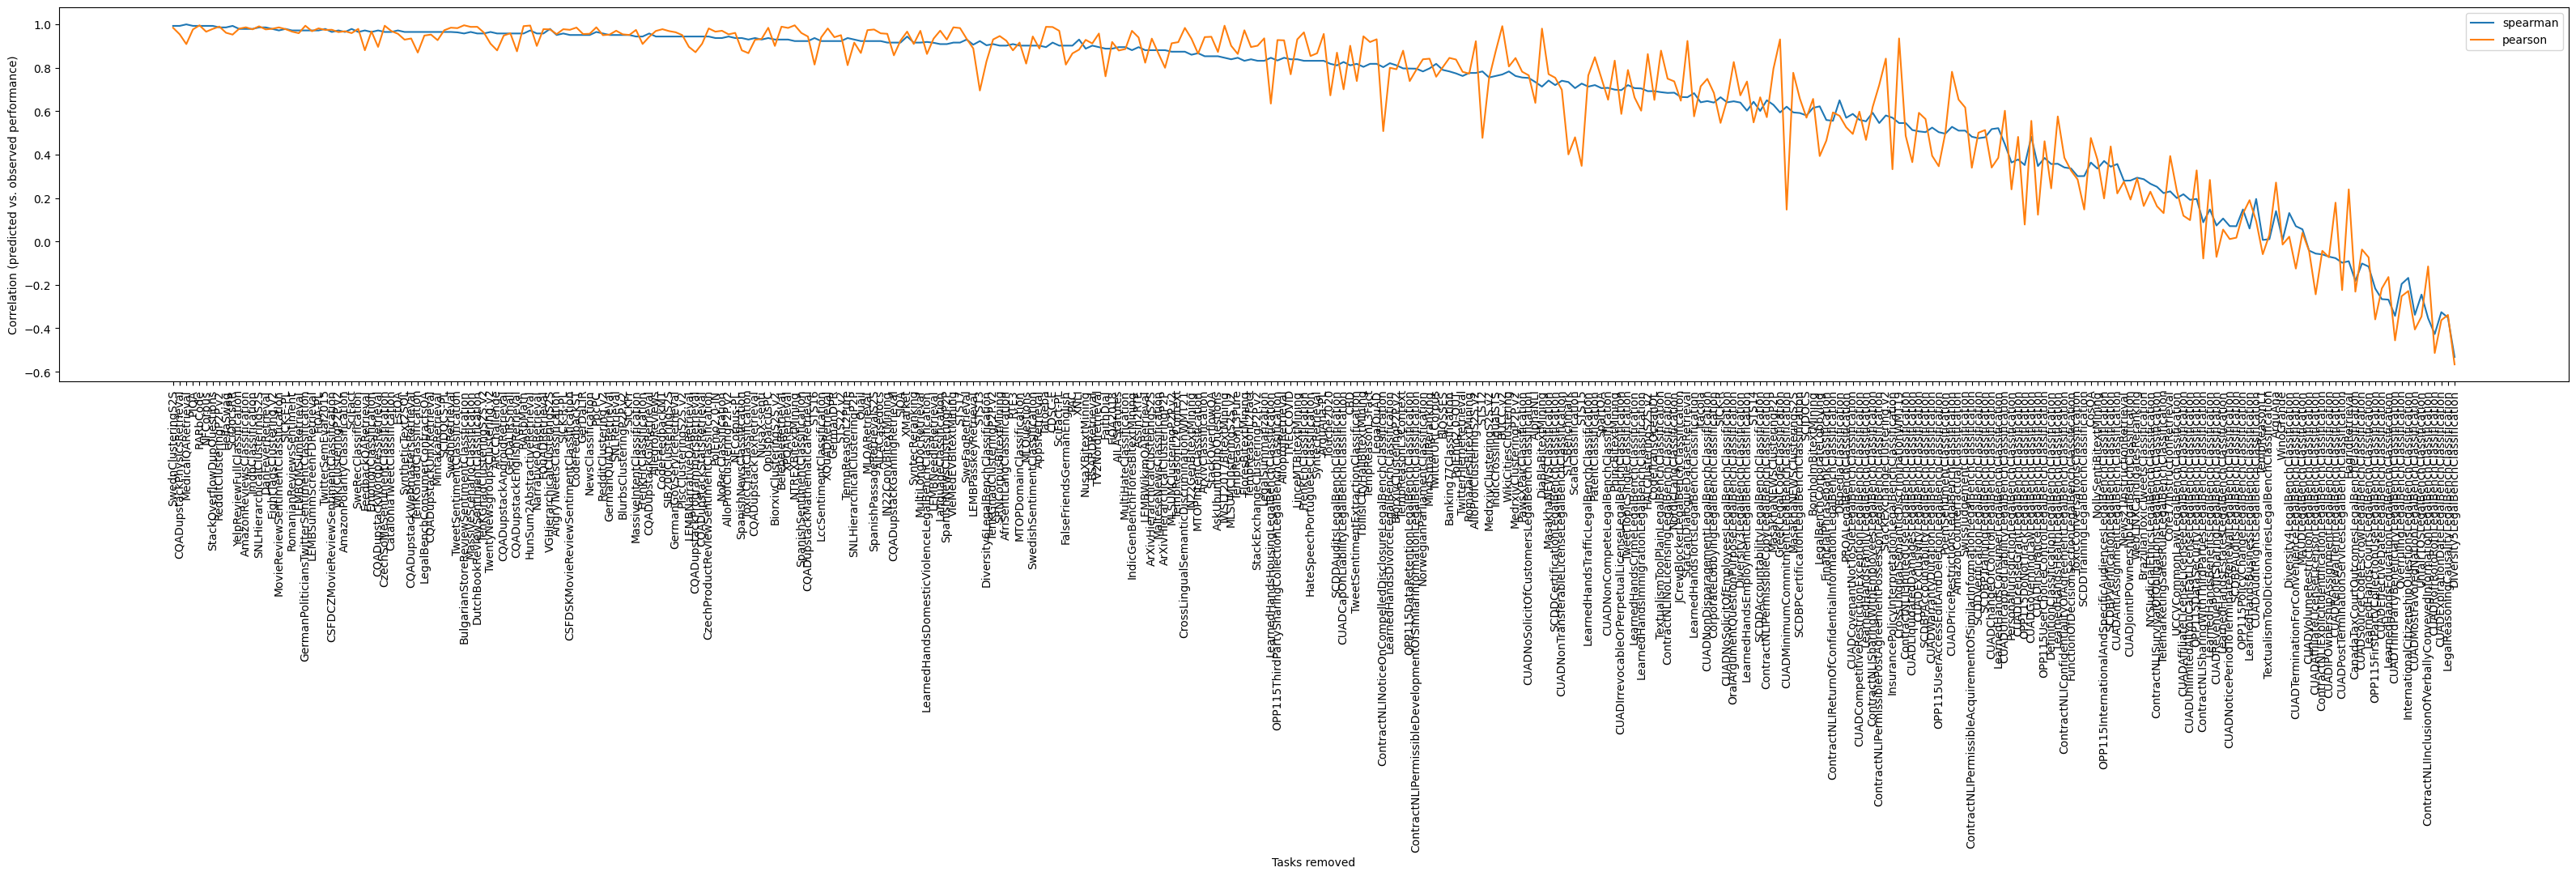

In [55]:
# plotting the predictability scores with the tasks removed
import matplotlib.pyplot as plt

# make the plot wider
plt.figure(figsize=(40, 6))

for metric in ["spearman", "pearson"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Correlation (predicted vs. observed performance)")
plt.legend()

# add task names to the x-axis
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

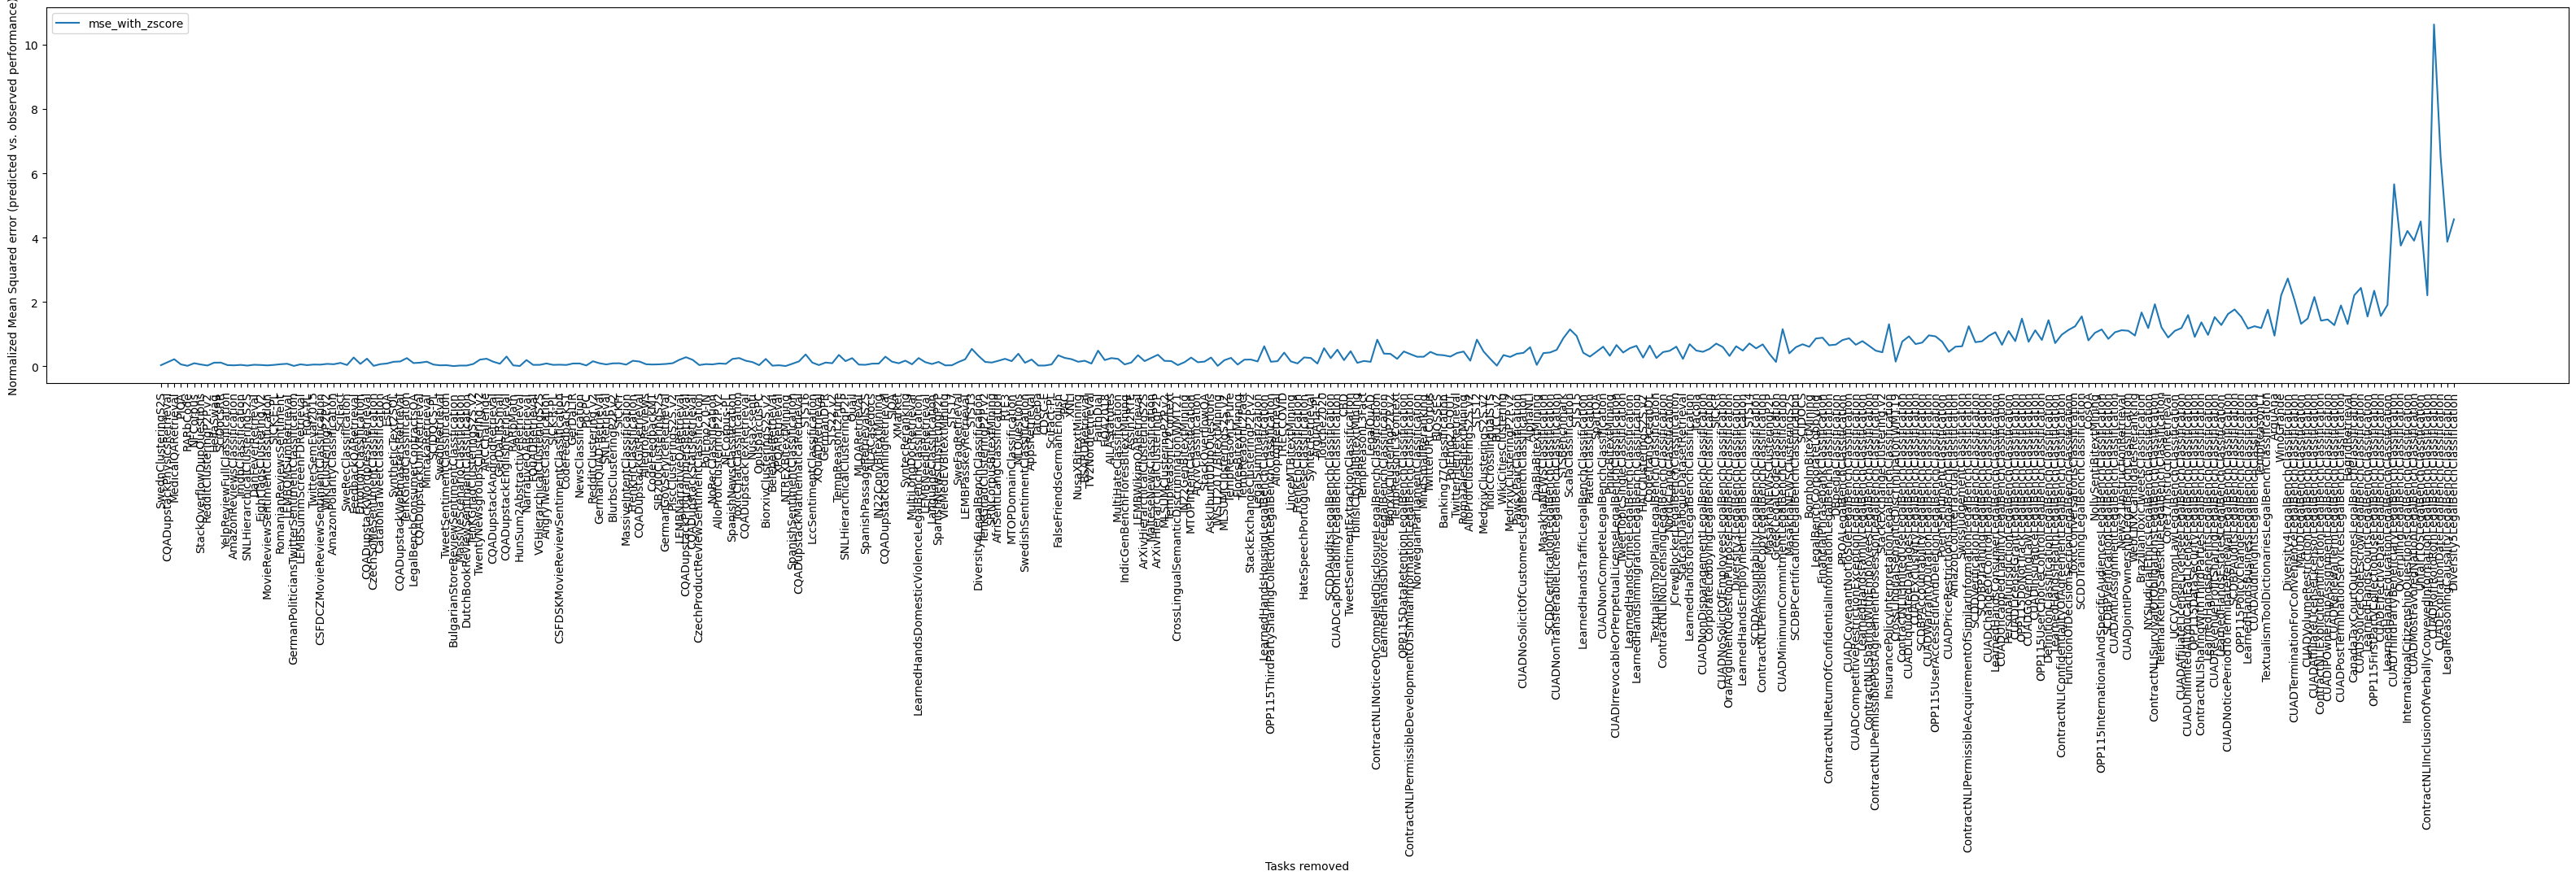

In [56]:
# plotting the predictability scores with the tasks removed

plt.figure(figsize=(40, 6))

for metric in ["mse_with_zscore"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Normalized Mean Squared error (predicted vs. observed performance)")
plt.legend()

# add task names to the x-axis  
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

## Constructing the Benchmark

In [31]:
# we now have the tasks:
tasks_to_select_from

['BibleNLPBitextMining',
 'NorwegianCourtsBitextMining',
 'CzechSubjectivityClassification',
 'DanishPoliticalCommentsClassification',
 'EstonianValenceClassification',
 'ItaCaseholdClassification',
 'AfriSentiClassification',
 'MultilingualSentimentClassification',
 'Moroco',
 'FrenkSlClassification',
 'DalajClassification',
 'BlurbsClusteringS2S.v2',
 'BigPatentClustering.v2',
 'VGHierarchicalClusteringP2P',
 'PlscClusteringP2P.v2',
 'SwednClusteringP2P',
 'GreekCivicsQA',
 'WikipediaRetrievalMultilingual',
 'NorQuadRetrieval',
 'TRECCOVID-PL',
 'Robust04InstructionRetrieval',
 'MultiEURLEXMultilabelClassification',
 'CTKFactsNLI',
 'SprintDuplicateQuestions',
 'PSC',
 'SICK-BR-PC',
 'AlloprofReranking',
 'WikipediaRerankingMultilingual',
 'GermanSTSBenchmark',
 'FinParaSTS',
 'SemRel24STS',
 'CDSC-R',
 'Assin2STS',
 'STSES']

In [59]:
tasks = mteb.get_tasks(tasks=tasks_to_select_from, languages=eu_languages)

# we can now create a benchmark
benchmark = mteb.Benchmark(
    name="mteb(eu)",
    tasks=tasks,
    description="Benchmark for evaluating document embedding models for European languages",
    citation="",
    reference="",
)

In [79]:
# create a dataframe with tasks
import pandas as pd
data = []

eu_langs = set(eu_languages)

for t in tasks:
    data.append(
        {
            "Name": t.metadata.name,
            "Type": t.metadata.type,
            "Languages": set(t.metadata.languages) & eu_langs,
            "Domains": t.metadata.domains,
            "License": t.metadata.license,
            "Description": t.metadata.description,
        }
    )

tasks_df = pd.DataFrame(data)
tasks_df

,Name,Type,Languages,Domains,License,Description
0,BibleNLPBitextMining,BitextMining,"{lit, nld, ita, deu, dan, swe, por, hun, spa, ...","[Religious, Written]",CC-BY-SA-4.0,"Partial Bible translations in 829 languages, a..."
1,NorwegianCourtsBitextMining,BitextMining,"{nno, nob}","[Legal, Written]",CC BY 4.0,Nynorsk and Bokmål parallel corpus from Norweg...
2,CzechSubjectivityClassification,Classification,{ces},"[Reviews, Written]",Not specified,An Czech dataset for subjectivity classification.
3,DanishPoliticalCommentsClassification,Classification,{dan},"[Social, Written]",Not specified,A dataset of Danish political comments rated f...
4,EstonianValenceClassification,Classification,{est},"[News, Written]",CC BY 4.0,Dataset containing annotated Estonian news dat...
5,ItaCaseholdClassification,Classification,{ita},"[Legal, Government, Written]",Apache 2.0,An Italian Dataset consisting of 1101 pairs of...
6,AfriSentiClassification,Classification,{por},"[Social, Written]",Creative Commons Attribution 4.0 International...,AfriSenti is the largest sentiment analysis da...
7,MultilingualSentimentClassification,Classification,"{pol, ell, deu, spa, hrv, fin, mlt, eus, slk, ...","[Reviews, Written]",Not specified,Sentiment classification dataset with binary\n...
8,Moroco,Classification,{ron},"[News, Written]",CC BY-4.0,The Moldavian and Romanian Dialectal Corpus. T...
9,FrenkSlClassification,Classification,{slv},"[Social, Written]",Not specified,Slovenian subset of the FRENK dataset. Also av...


## Reviewed

To ensure that these tasks are appropriate we ask speakers of the language to suggest improve upon the selection of the tasks:

| Name                                 | Evaluated languages            |
|--------------------------------------|--------------------------------|
| Kenneth Enevoldsen (@KennethEnevoldsen) | Danish (dan), English (eng), Swedish (swe), Norwegian (nno, nob) |

Kenneth: 
  - Norwegian: looks reasonable both datasets are good
  - Danish: I would replace `DanishPoliticalCommentsClassification` with `AngryTweetsClassification` given the license and quality (filtering based on missing license added)
  - Swedish: Dataset is reasonable
  - English: `SprintDuplicateQuestions` does not have a permissible license, might be worth filtering
